# 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론은 간단하고 좋은 모델이지만, 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다는 단점이 있다.

로지스틱 회귀는 간단하지만 선형 이진분류에 더 강력한 알고리즘이다.

## 로지스틱 회귀의 이해와 조건부 확률

로지스틱 회귀는 선형 회귀와 비슷하게 입력 특성에 대한 선형 함수를 만들고, 그 출력을 시그모이드 함수에 통과시켜 0과 1 사이의 값을 만든다.

> 다중 클래스를 위한 로지스틱 회귀
> 로지스틱 회귀는 이진 분류 알고리즘이지만, 다중 클래스 분류 알고리즘으로 일반화할 수 있다.

### 오즈비

오즈비는 하나의 이벤트가 다른 이벤트보다 발생할 확률이 얼마나 높은지를 나타내는 측정 방법이다.

$$
\text{odds ratio} = \frac{p}{(1-p)}
$$

P는 양성 샘플일 확률이다. 양성샘플은 좋은 것을 의미하지 않고 단지 예측하고자 하는 클래스를 의미한다.
예를 들어 특정 증상을 보이는 환자가 어떤 질병에 걸렸을 확률이다. 양성 샘플이 클래스 세이블 y=1인 샘플이고 증상을 특성 x로 생각할 수 있다.
따라서 확률 P를 특성이 x인 샘플이 클래스 1에 속할 조건부 확률 p: $p(y=1|x)$로 나타낼 수 있다.

오즈비에 로그함수를 취해 로짓(logit) 함수를 정의할 수 있다.
$$
\text{logit}(p) = \log \frac{p}{(1-p)}
$$

logit 함수는 0과 1 사이의 p를 받아 실수 범위 값으로 변환한다.

로지스틱모델에서는 가중치가 적용된 입력과 로그 오즈 사이에 선형 관계가 있다고 가정한다.

$$
logit(p) = w_1x_1 + ... + w_mx_m = \sum_{i=1}^m w_ix_i + b = w^Tx +b
$$

이 식은 로그 오즈와 최종 입력 사이에 선형 관계에 대한 가정을 나타내지만 실제 관심 대상은 샘플의 클래스 소속 확률인p이다.
logit 함수는 확률을 실수에 매핑하므로 이 함수의 역함수를 사용하여 실수 범위를 확률p에 대한 범위로 다시 매핑할 수 있다.

logit함수를 거꾸로 뒤집은 함수를 **로지스틱 시그모이드 함수(Logistic sigmoid function)**라고 한다. 함수 모양이 S자 형태로 간단히 시그모이드 함수라고도 한다.

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

여기에서 z는 가중치와 입력(즉, 훈련 샘플의 특성)의 선형 조합으로 이루어진 최종 입력이다. z는 $z = w^Tx + b$로 나타낼 수 있다.

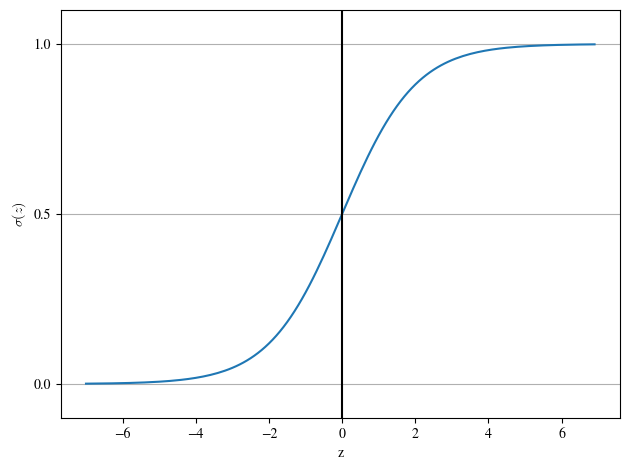

In [5]:
# 시그모이드 함수 -7 ~ 7 까지
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

z가 무한대로 가면 (z->∞) e^-z가 매우 작아지기 때문에 $\sigma(z) $ 는 1에 가까워진다. 비슷하게 z->-∞로 가면 $\sigma(z)$는 0에 가까워진다.
따라서 z가 선형 함수로 증가하면 $\sigma(z)$는 0에서 1 사이의 값을 출력한다. 위의 그래프에서 볼 수 있듯이 z가 0일 때 $\sigma(z)$는 0.5이다.

### 3.3.2 로지스틱 손실 함수의 가중치 학습

평균 제곱 오차 손실 함수
$$
L(w,b|x) = \Sigma_{i}^n \frac{1}{2}(\sigma(z^{(i)}) - y^{(i)})^2
$$